# Assignment 1 - Predict Concrete Compressive Strength


## 1. Data Exploration


### 1.1 Loading data into dataframe


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel("Concrete_Data.xls")

### 1.2 Exploratory data analysis (EDA)


In [2]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


This dataset contains many samples of concrete with different compositions as well as the age of the concrete and the compressive strength.

- Features: cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, fine aggregate, and age.
- Target: concrete compressive strength.


Simplifying the columns.


In [3]:
new_columns = [
    "cement",
    "slag",
    "ash",
    "water",
    "superplasticizer",
    "coarseagg",
    "fineagg",
    "age",
    "strength",
]

df.columns = new_columns

df.head()

,cement,slag,ash,water,superplasticizer,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   ash               1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseagg         1030 non-null   float64
 6   fineagg           1030 non-null   float64
 7   age               1030 non-null   int64  
 8   strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


This dataset contains 1030 samples of concrete. All of the data are numerical (float and long integer).


In [5]:
df.describe()

,cement,slag,ash,water,superplasticizer,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


Above is just statistical measurements on the given dataset.


c:\Users\shahr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\shahr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\shahr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\shahr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

<AxesSubplot: xlabel='strength', ylabel='Count'>

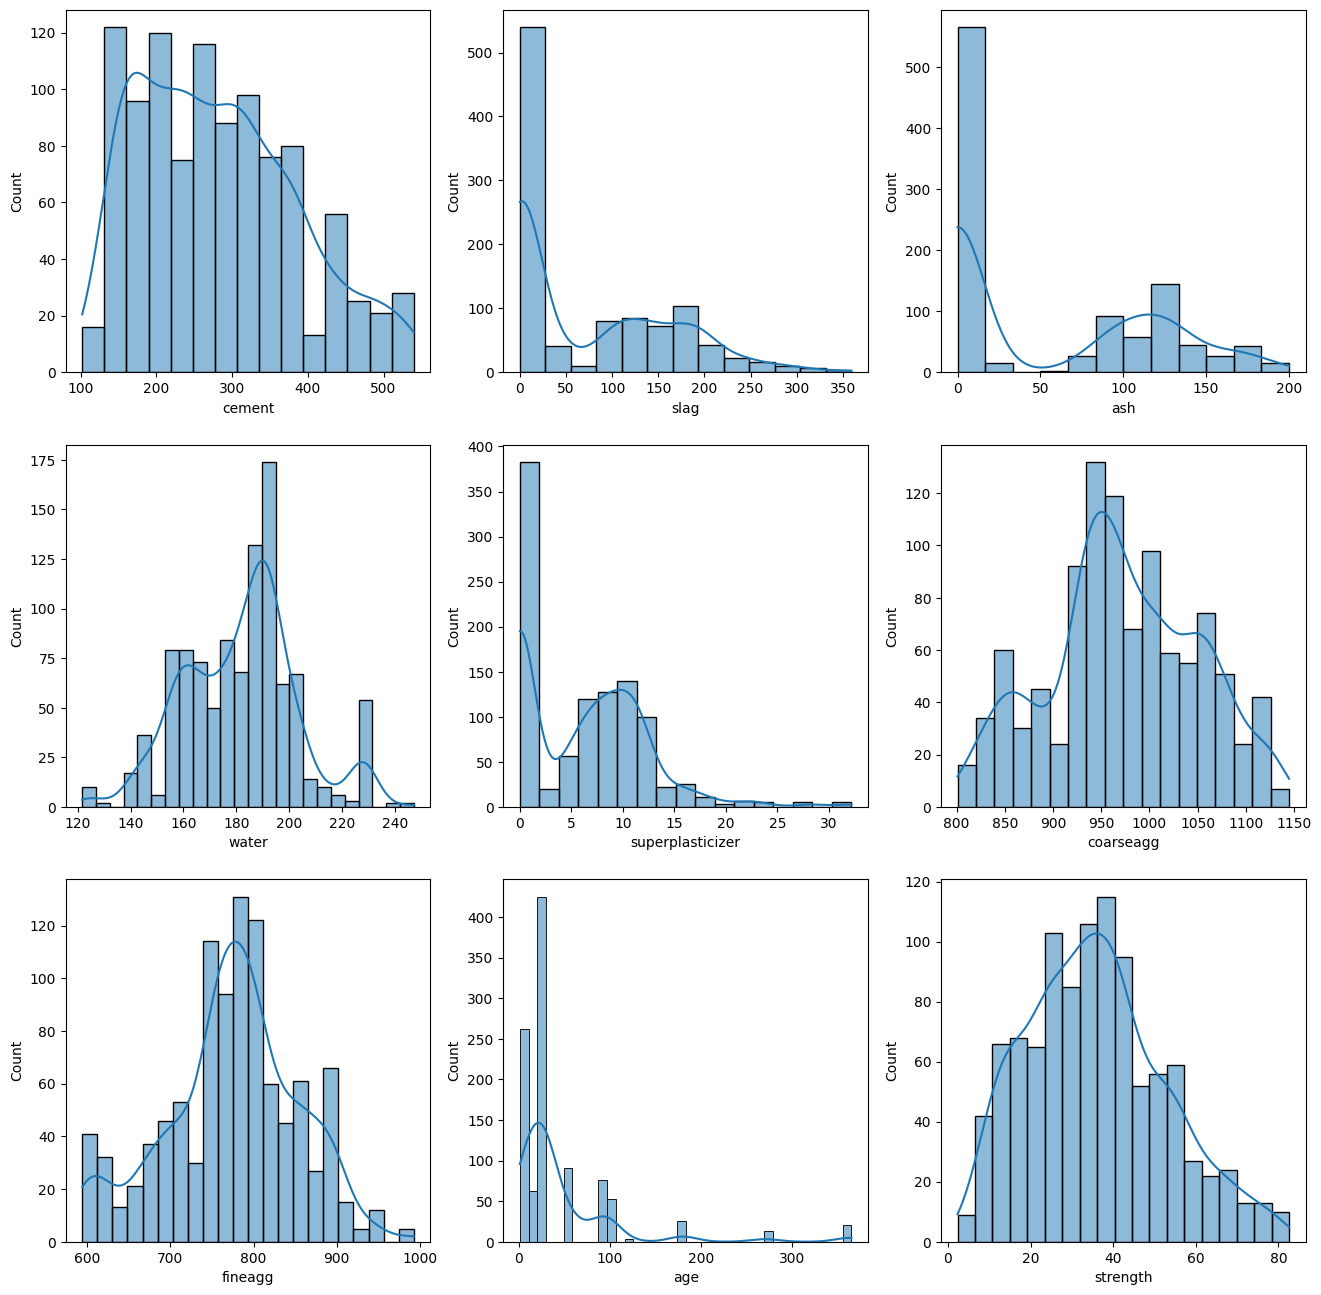

In [6]:
fig, ax2 = plt.subplots(3, 3, figsize=(16, 16))
sns.histplot(df["cement"], ax=ax2[0][0], kde=True)
sns.histplot(df["slag"], ax=ax2[0][1], kde=True)
sns.histplot(df["ash"], ax=ax2[0][2], kde=True)
sns.histplot(df["water"], ax=ax2[1][0], kde=True)
sns.histplot(df["superplasticizer"], ax=ax2[1][1], kde=True)
sns.histplot(df["coarseagg"], ax=ax2[1][2], kde=True)
sns.histplot(df["fineagg"], ax=ax2[2][0], kde=True)
sns.histplot(df["age"], ax=ax2[2][1], kde=True)
sns.histplot(df["strength"], ax=ax2[2][2], kde=True)

### 1.3 Creating a Test Set


The data will be split into 80% training data and 20% test data using stratified sampling method.


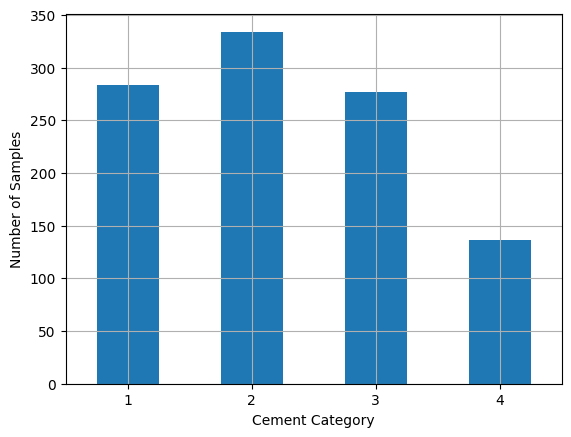

In [7]:
from sklearn.model_selection import train_test_split

df["cement_cat"] = pd.cut(
    df["cement"], bins=[100, 200, 300, 400, np.inf], labels=[1, 2, 3, 4])

df["cement_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Cement Category")
plt.ylabel("Number of Samples")
plt.show()

train_set, test_set = train_test_split(
    df, test_size=0.2, stratify=df["cement_cat"], random_state=42)

### 1.3 Visualize correlation between features and target variable


Make a copy of training set for further data exploration.


In [8]:
# Drop the new column added for stratification
for set_ in (train_set, test_set):
    set_.drop("cement_cat", axis=1, inplace=True)

concrete = train_set.copy()

Visualize pairwise relations.


c:\Users\shahr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\shahr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\shahr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\shahr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

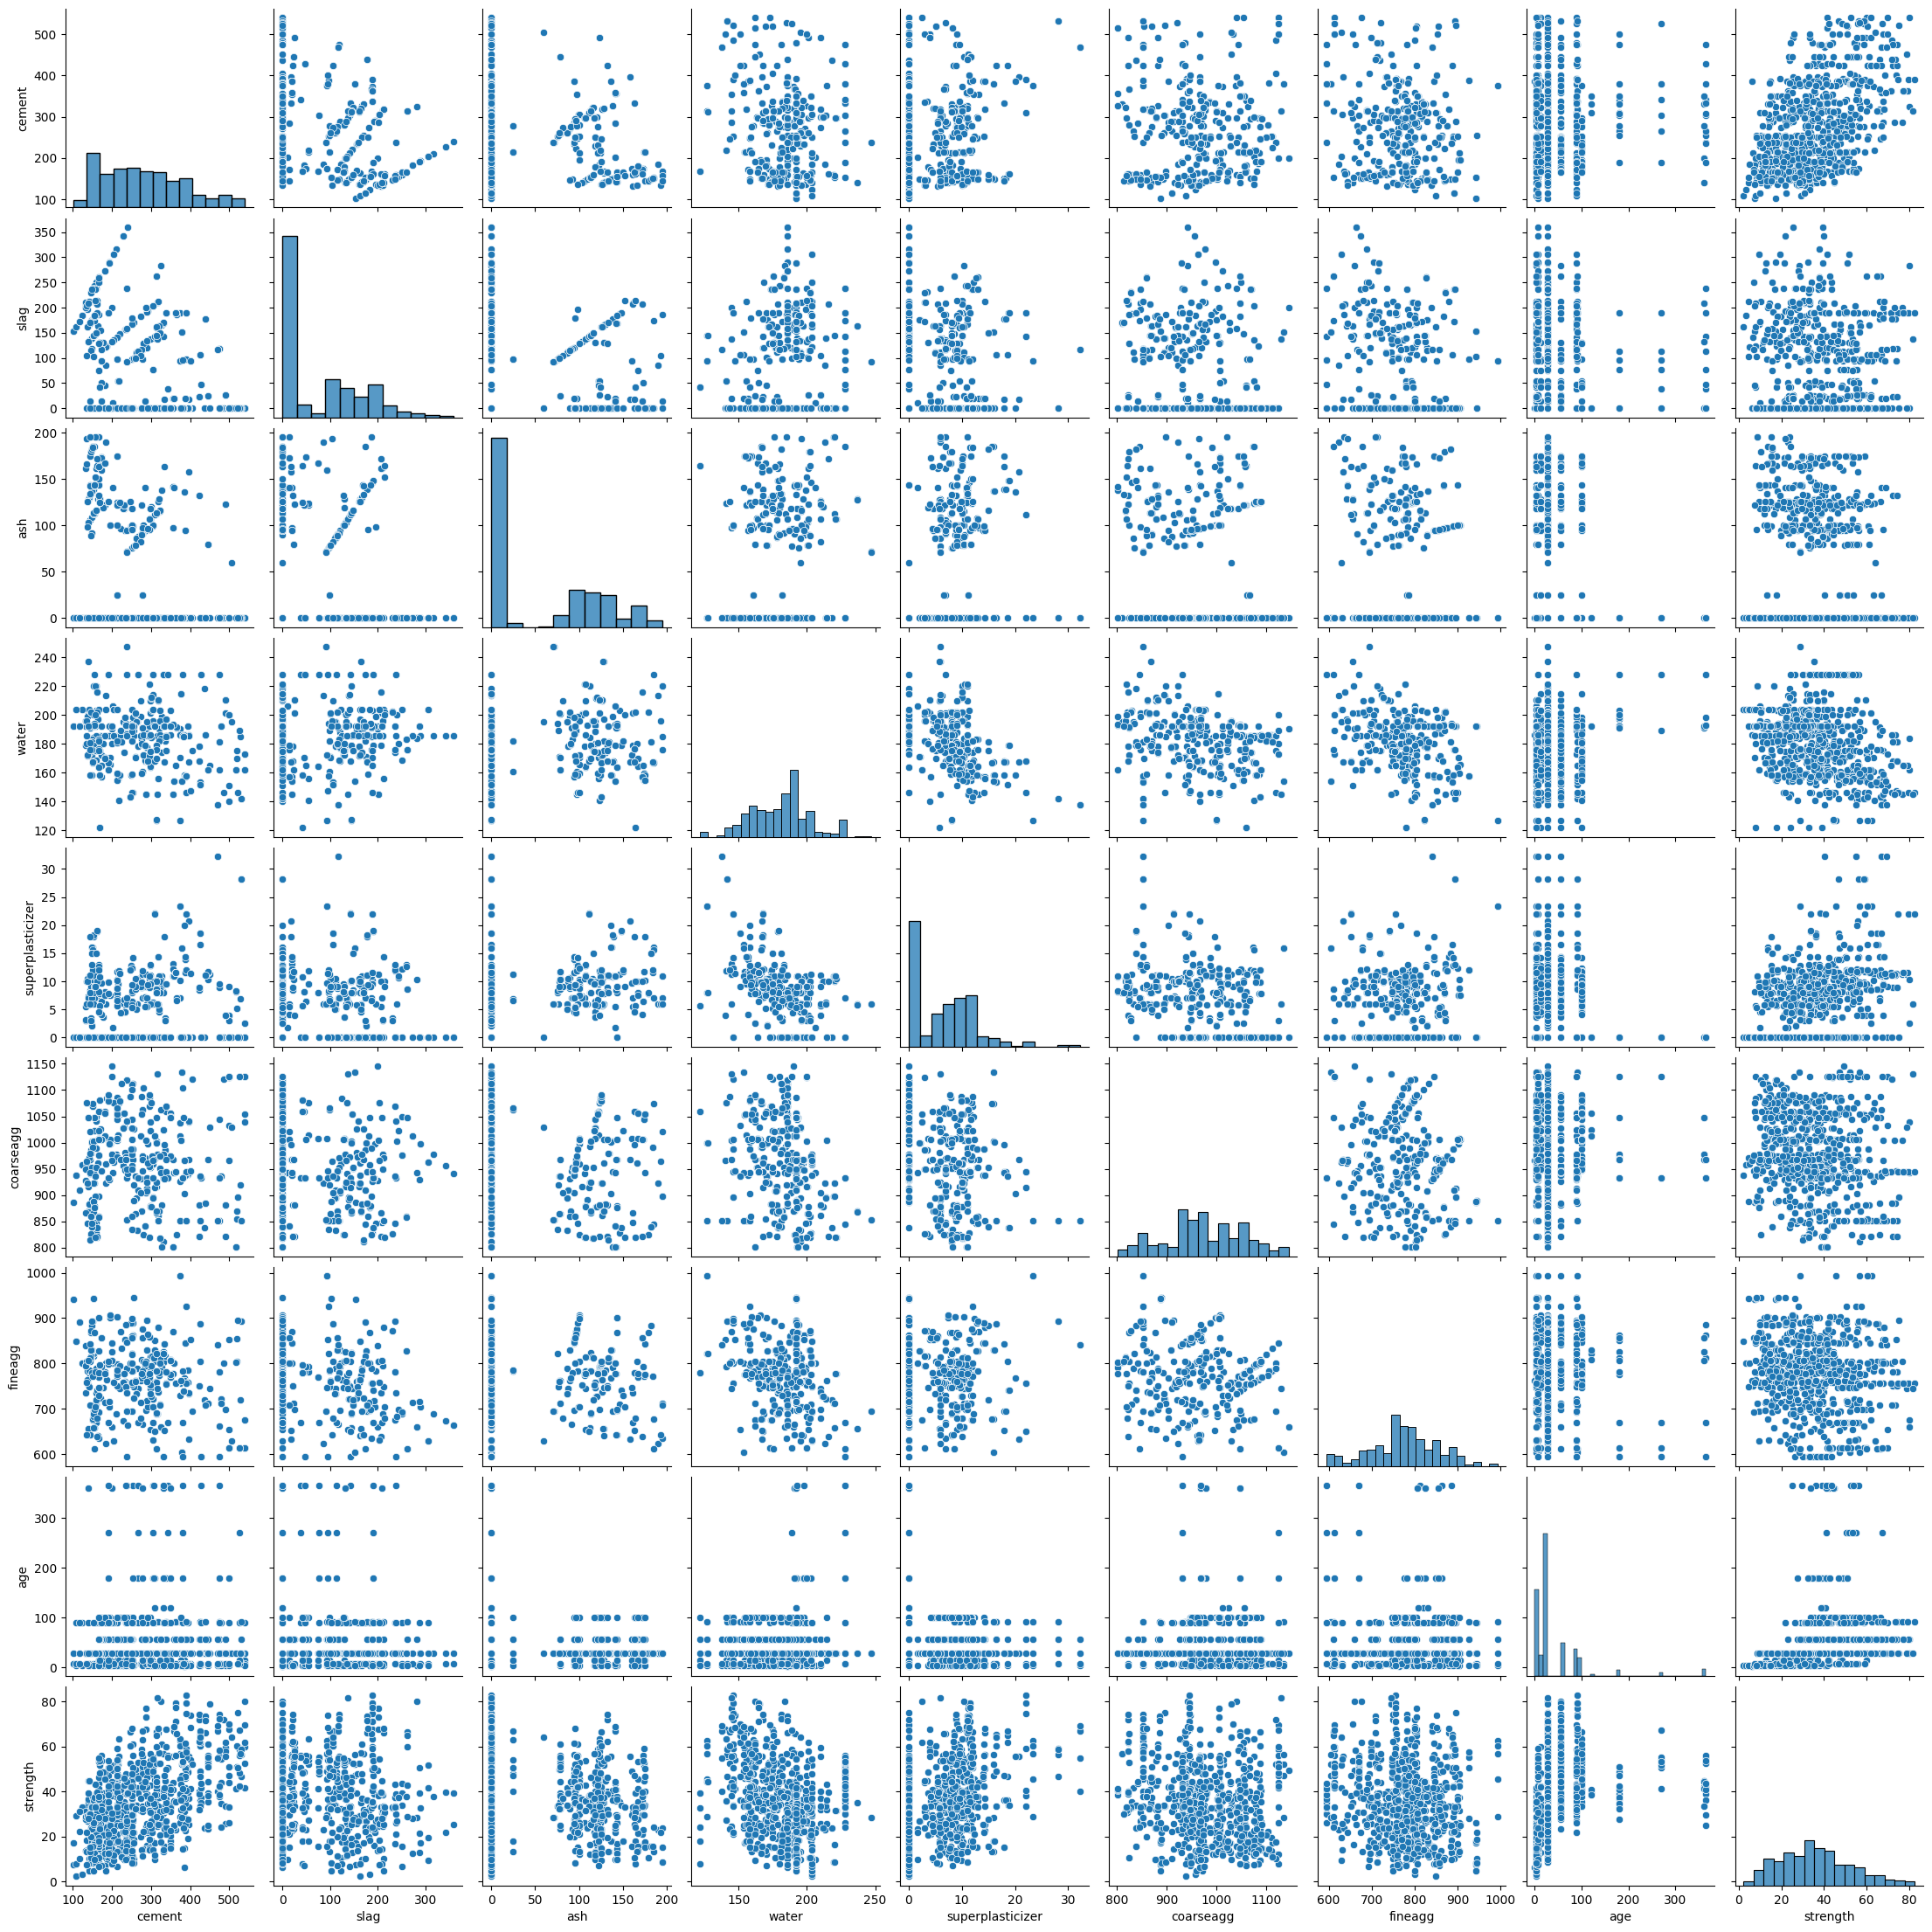

In [9]:
sns.pairplot(concrete)
plt.show()

Based on this pairplot, we can see that cement highly correlates with the concrete's compressive strength based on the linearity.


Plot heatmap to quantify the correlation of features to the target variable.


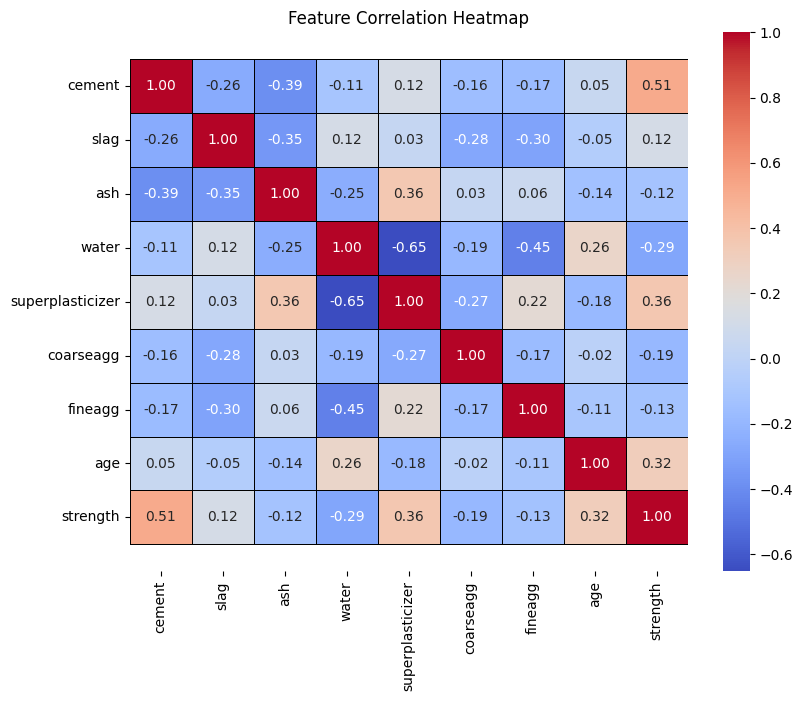

In [10]:
corr = concrete.corr()

plt.figure(figsize=(9, 7))
sns.heatmap(
    corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, linecolor="black")
b, t = plt.ylim()
plt.ylim(b + 0.5, t - 0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

This heatmap proves our previous observations. Other features that highly correlates with the strength are superplastizer and age.


### 1.4 Experiment with different feature combinations

In [11]:
concrete["water_per_cement"] = concrete["water"] / concrete["cement"]
concrete["superplasticizer_per_cement"] = concrete["superplasticizer"] / concrete["cement"]
concrete["fineagg_per_cement"] = concrete["fineagg"] / concrete["cement"]
concrete["coarseagg_per_cement"] = concrete["coarseagg"] / concrete["cement"]
concrete["slag_per_cement"] = concrete["slag"] / concrete["cement"]
concrete["ash_per_cement"] = concrete["ash"] / concrete["cement"]

corr = concrete.corr()
corr["strength"].sort_values(ascending=False)

strength                       1.000000
cement                         0.513879
superplasticizer               0.362835
age                            0.320268
slag                           0.121389
superplasticizer_per_cement    0.104966
slag_per_cement               -0.075003
ash                           -0.124334
fineagg                       -0.129115
coarseagg                     -0.191583
ash_per_cement                -0.200997
water                         -0.285888
fineagg_per_cement            -0.486534
coarseagg_per_cement          -0.499191
water_per_cement              -0.513841
Name: strength, dtype: float64

## 2. Data Preprocessing


### 2.1 Split features and target


In [12]:
concrete = train_set.drop("strength", axis=1)
concrete_labels = train_set["strength"].copy()

### 2.1 Handle null values and outliers


Check for null values.


In [13]:
concrete.isnull().sum()

cement              0
slag                0
ash                 0
water               0
superplasticizer    0
coarseagg           0
fineagg             0
age                 0
dtype: int64

There is no null value inside the training data. Noise has been filtered out from the start.


Finding out the outliers.

Outliers in cement:  0
Outliers in slag:  4
Outliers in ash:  0
Outliers in water:  2
Outliers in superplasticizer:  8
Outliers in coarseagg:  0
Outliers in fineagg:  0
Outliers in age:  24


<AxesSubplot: >

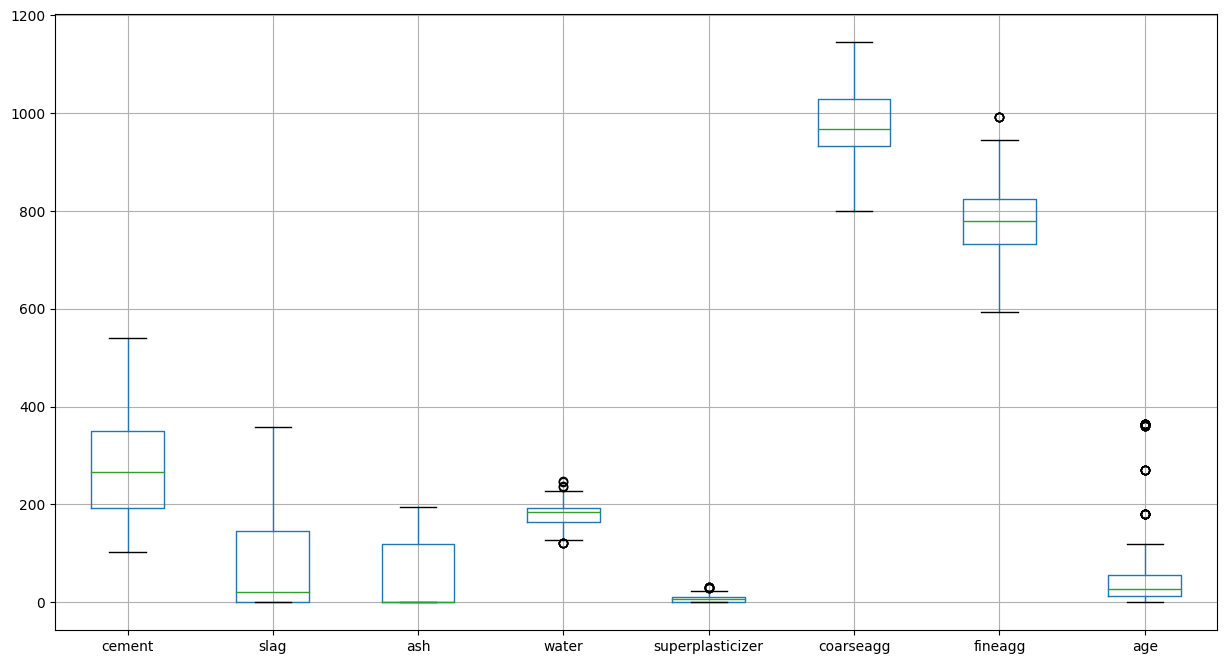

In [14]:
print('Outliers in cement: ', concrete[((concrete.cement - concrete.cement.mean())/concrete.cement.std()).abs()>3]['cement'].count())
print('Outliers in slag: ', concrete[((concrete.slag - concrete.slag.mean())/concrete.slag.std()).abs()>3]['slag'].count())
print('Outliers in ash: ', concrete[((concrete.ash - concrete.ash.mean())/concrete.ash.std()).abs()>3]['ash'].count())
print('Outliers in water: ', concrete[((concrete.water - concrete.water.mean())/concrete.water.std()).abs()>3]['water'].count())
print('Outliers in superplasticizer: ', concrete[((concrete.superplasticizer - concrete.superplasticizer.mean())/concrete.superplasticizer.std()).abs()>3]['superplasticizer'].count())
print('Outliers in coarseagg: ', concrete[((concrete.coarseagg - concrete.coarseagg.mean())/concrete.coarseagg.std()).abs()>3]['coarseagg'].count())
print('Outliers in fineagg: ', concrete[((concrete.fineagg - concrete.fineagg.mean())/concrete.fineagg.std()).abs()>3]['fineagg'].count())
print('Outliers in age: ', concrete[((concrete.age - concrete.age.mean())/concrete.age.std()).abs()>3]['age'].count())

concrete.boxplot(figsize=(15,8))

Replacing the outliers with mean.

Outliers in cement:  0
Outliers in slag:  4
Outliers in ash:  0
Outliers in water:  0
Outliers in superplasticizer:  5
Outliers in coarseagg:  0
Outliers in fineagg:  0
Outliers in age:  24


<AxesSubplot: >

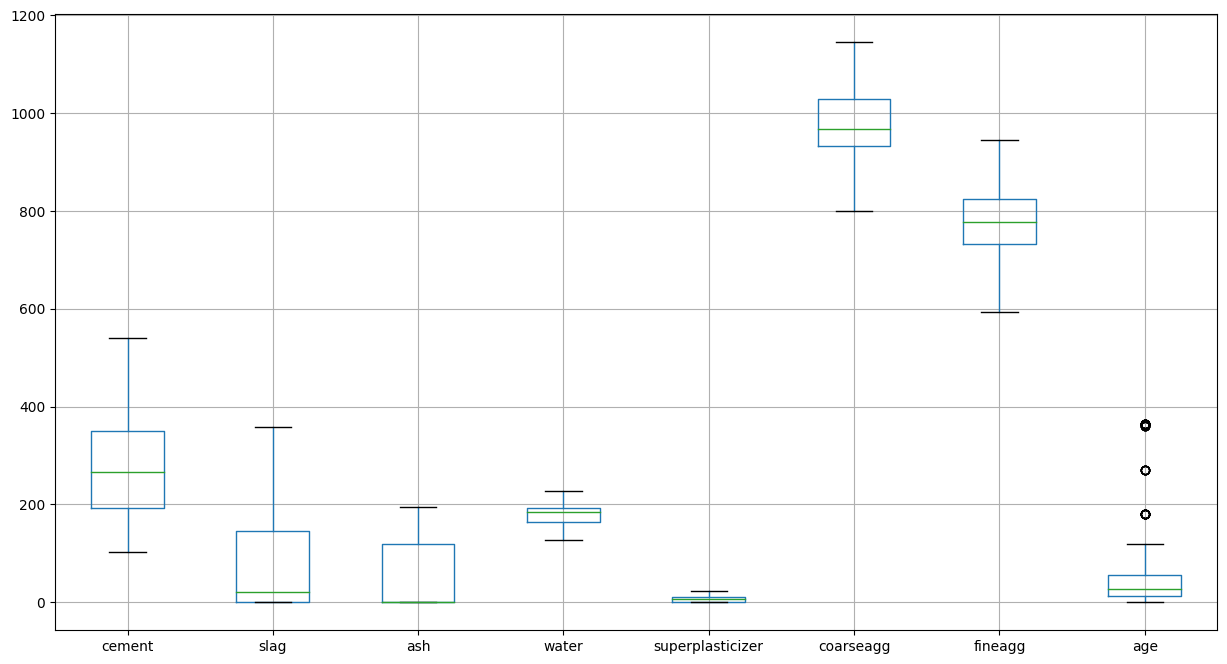

In [15]:
for cols in concrete.columns[:-1]:
  Q1 = concrete[cols].quantile(0.25)
  Q3 = concrete[cols].quantile(0.75)
  iqr = Q3 - Q1

  low = Q1-1.5*iqr
  high = Q3+1.5*iqr
  concrete.loc[(concrete[cols] < low) | (concrete[cols] > high), cols] = concrete[cols].mean()

print('Outliers in cement: ', concrete[((concrete.cement - concrete.cement.mean())/concrete.cement.std()).abs()>3]['cement'].count())
print('Outliers in slag: ', concrete[((concrete.slag - concrete.slag.mean())/concrete.slag.std()).abs()>3]['slag'].count())
print('Outliers in ash: ', concrete[((concrete.ash - concrete.ash.mean())/concrete.ash.std()).abs()>3]['ash'].count())
print('Outliers in water: ', concrete[((concrete.water - concrete.water.mean())/concrete.water.std()).abs()>3]['water'].count())
print('Outliers in superplasticizer: ', concrete[((concrete.superplasticizer - concrete.superplasticizer.mean())/concrete.superplasticizer.std()).abs()>3]['superplasticizer'].count())
print('Outliers in coarseagg: ', concrete[((concrete.coarseagg - concrete.coarseagg.mean())/concrete.coarseagg.std()).abs()>3]['coarseagg'].count())
print('Outliers in fineagg: ', concrete[((concrete.fineagg - concrete.fineagg.mean())/concrete.fineagg.std()).abs()>3]['fineagg'].count())
print('Outliers in age: ', concrete[((concrete.age - concrete.age.mean())/concrete.age.std()).abs()>3]['age'].count())

concrete.boxplot(figsize=(15,8))

We can see that the outliers in the training set has been reduced.

### 2.2 Feature scaling


Perform feature scaling in a pipeline.


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer

def ratio_pipeline():
    return make_pipeline(SimpleImputer(strategy="median"),FunctionTransformer(column_ratio, feature_names_out="one-to-one"), StandardScaler())

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return["ratio"]

def log_pipeline():
    return make_pipeline(
        FunctionTransformer(np.log1p, feature_names_out="one-to-one"), StandardScaler())

def default_pipeline():
    return make_pipeline(StandardScaler())

preprocessing = ColumnTransformer([
("water_per_cement", ratio_pipeline(),
["water", "cement"]),
("coarseagg_per_cement", ratio_pipeline(),
["coarseagg", "cement"]),
("fineagg_per_cement", ratio_pipeline(),
["fineagg", "cement"]),
("log", log_pipeline(),
["age"]),
("default", default_pipeline(),
 ["cement", "water", "fineagg", "coarseagg"])
],remainder=default_pipeline())

# preprocessing = ColumnTransformer(
#     [("log", log_pipeline(), ["age"])], remainder=default_pipeline())

concrete_prepared = preprocessing.fit_transform(concrete)
concrete_prepared.shape

(824, 11)

In [17]:
concrete_prepared.shape

(824, 11)

## 3. Model Building


### 3.1 Linear regression


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = make_pipeline(preprocessing, LinearRegression())
lr.fit(concrete, concrete_labels)
lr_predictions = lr.predict(concrete)
lr_rmse = mean_squared_error(concrete_labels, lr_predictions, squared=False)
print("Model training RMSE for Linear Regression: ", lr_rmse)

Model training RMSE for Linear Regression:  6.957780249184199


### 3.2 Decision tree


In [19]:
from sklearn.tree import DecisionTreeRegressor

dt = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
dt.fit(concrete, concrete_labels)
dt_predictions = dt.predict(concrete)
dt_rmse = mean_squared_error(concrete_labels, dt_predictions, squared=False)
print("Model training RMSE for Decision Tree: ", dt_rmse)

Model training RMSE for Decision Tree:  1.012116347248865


### 3.3 Random forest


In [20]:
from sklearn.ensemble import RandomForestRegressor

rf = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
rf.fit(concrete, concrete_labels)
rf_predictions = rf.predict(concrete)
rf_rmse = mean_squared_error(concrete_labels, rf_predictions, squared=False)
print("Model training RMSE for Random Forest: ", rf_rmse)

Model training RMSE for Random Forest:  2.0155930626125764


## 4. Model Optimization


### 4.1 Cross-validation


Cross-validate the linear regression model.


In [21]:
from sklearn.model_selection import cross_val_score

lr_cv = -cross_val_score(
    lr, concrete, concrete_labels, cv=10, scoring="neg_root_mean_squared_error")
print("Cross-validation RMSE for Linear Regression:", lr_cv.mean())

Cross-validation RMSE for Linear Regression: 7.05847342455708


Cross-validate the decision tree model.


In [22]:
dt_cv = -cross_val_score(
    dt, concrete, concrete_labels, cv=10, scoring="neg_root_mean_squared_error"
)

print("Cross-validation RMSE for Decision Tree:", dt_cv.mean())

Cross-validation RMSE for Decision Tree: 6.006169729161347


Cross-validate the random forest model.


In [23]:
rf_cv = -cross_val_score(
    rf, concrete, concrete_labels, cv=10, scoring="neg_root_mean_squared_error"
)

print("Cross-validation RMSE for Random Forest:", rf_cv.mean())

Cross-validation RMSE for Random Forest: 4.879763790882845


Based on the cross-validation RMSE results, we can see that both decision tree and random forest are overfitting due to the higher RMSE during cross-validation compared to RMSE during model training. However, random forest is still the best performing model when compared to both linear regression and decision tree.


### 4.2 Hyperparameters tuning


Tuning the random forest model.


In [24]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline(
    [
        ("preprocessing", preprocessing),
        ("random_forest", RandomForestRegressor(random_state=42)),
    ]
)

param_grid = [
    {
        "random_forest__n_estimators": [10, 30, 50, 100],
        "random_forest__max_features": [2, 4, 6, 8, 10, 12, 14, 16],
    },
    {
        "random_forest__bootstrap": [False],
        "random_forest__n_estimators": [3, 10],
        "random_forest__max_features": [2, 3, 4],
    },
]

grid_search = GridSearchCV(
    full_pipeline, param_grid, cv=3, scoring="neg_root_mean_squared_error"
)
grid_search.fit(concrete, concrete_labels)

rf_tuned = grid_search.best_estimator_

# cv_res = pd.DataFrame(grid_search.cv_results_)
# cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
# best_hyperparameters_grid = grid_search.best_params_
# best_max_features = best_hyperparameters_grid["random_forest__max_features"]

# feature_importances = rf_tuned["random_forest"].feature_importances_
# feature_importances.round(2)

# sorted(
#     zip(feature_importances, rf_tuned["preprocessing"].get_feature_names_out()),
#     reverse=True,
# )

## 5. Model Evaluation


### 5.1 RMSE on Untuned Models


Check linear regression model accuracy on unseen data.


In [25]:
X_test = test_set.drop("strength", axis=1)
y_test = test_set["strength"].copy()
lr_final_predict = lr.predict(X_test)
lr_final_rmse = mean_squared_error(y_test, lr_final_predict, squared=False)
print("Testing RMSE for Linear Regression: ", lr_final_rmse)

Testing RMSE for Linear Regression:  6.978698810187595


Check decision tree model accuracy on unseen data.


In [26]:
dt_final_predict = dt.predict(X_test)
dt_final_rmse = mean_squared_error(y_test, dt_final_predict, squared=False)
print("Testing RMSE for Decision Tree: ", dt_final_rmse)

Testing RMSE for Decision Tree:  5.563055179345012


Check untuned random forest model accuracy on unseen data.


In [27]:
rf_final_predict = rf.predict(X_test)
rf_final_rmse = mean_squared_error(y_test, rf_final_predict, squared=False)
print("Testing RMSE for Random Forest: ", rf_final_rmse)

Testing RMSE for Random Forest:  4.547929450185654


For untuned models, we can see that random forest is the best at predicting the concrete compressive strength when given unseen data.


### 5.2 RMSE on Tuned Model


Check tuned random forest model accuracy on unseen data.


In [28]:
rf_tuned_predict = rf_tuned.predict(X_test)
rf_tuned_rmse = mean_squared_error(y_test, rf_tuned_predict, squared=False)
print("Testing RMSE for Tuned Random Forest: ", rf_tuned_rmse)

Testing RMSE for Tuned Random Forest:  4.524430690785349


We can see after hyperparameter tuning, the random forest algorithm achieved lower RMSE value on unseen data. Hence, the model is improved.
